In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Geodesics as gd
import Model as md
import cmath as cmt
import glob
import os
import time
from scipy.optimize import curve_fit as cf

In [2]:
p = 5
q = 4
nlayers = 6
modl = md.FractonModel(p,q,nlayers)
save_dir = "../Data/P"+str(p)+"Q"+str(q)+"/"+str(nlayers)+"Layers"

corr1 = np.load(save_dir + "/Correlation.npy")
entr1 = np.load(save_dir + "/EntanglEntr.npy")


In [13]:
distances = np.linspace(1,int(len(modl.border)/2),int(len(modl.border)/2))/len(modl.border)
distances2 = np.linspace(1,int(len(modl.border)),int(len(modl.border)))/len(modl.border)

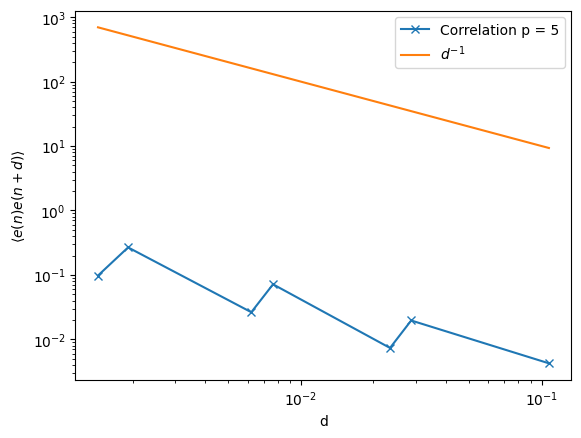

In [14]:
plt.plot(distances[corr1>0.0030],corr1[corr1>0.003],'x-',label = 'Correlation p = 5')
plt.plot(distances[corr1>0.0030],np.power(distances[corr1>0.0030],-1), label = r'$d^{-1}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\left< e(n)e(n+d)\right>$')
plt.xlabel('d')
plt.savefig(save_dir+"/CorrelationFig.png",format = 'png')

In [35]:
def func(x,c,a):
    return (c/3)*np.log(np.sin(x*np.pi))+a

par, pcov = cf(func,distances2[:-1],np.array(entr1[:-1]), p0 = [2.23,0.88/len(modl.border)])

In [38]:
print(par)
print(np.sqrt(pcov[0,0]),np.sqrt(pcov[1,1]))

[ 6.776983   15.08716252]
0.009637420193372648 0.0036202154287652217


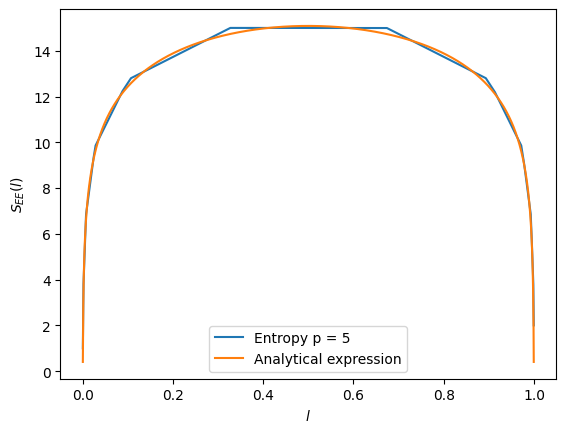

In [40]:
plt.plot(distances2[:-1],entr1[:-1],label = 'Entropy p = 5')
plt.plot(distances2[:-1],func(distances2[:-1],*par), label = 'Analytical expression')
plt.legend()
plt.ylabel(r'$S_{EE}(l)$')
plt.xlabel(r'$l$')
plt.savefig(save_dir+"/EntanglEntrFig.png",format = 'png')